In [5]:
import os
print("Current Working Directory " , os.getcwd())
os.chdir("/Users/bdlsejg1/Research/Data")

Current Working Directory  /Users/bdlsejg1


In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from pandas import options
import statsmodels.api as sm
from numpy import NaN
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [7]:
###making a graph of planula production

In [8]:
#https://gist.github.com/miklb/ed145757971096565723

import math, decimal, datetime
dec = decimal.Decimal

def position(dayQuestion): 
   diff = dayQuestion - datetime.datetime(2001, 1, 1)
   days = dec(diff.days) + (dec(diff.seconds) / dec(86400))
   lunations = dec("0.20439731") + (days * dec("0.03386319269"))

   return lunations % dec(1)

def phase(pos): 
   index = (pos * dec(8)) + dec("0.5")
   index = math.floor(index)
   return {
      0: "New Moon", 
      1: "Waxing Crescent", 
      2: "First Quarter", 
      3: "Waxing Gibbous", 
      4: "Full Moon", 
      5: "Waning Gibbous", 
      6: "Last Quarter", 
      7: "Waning Crescent"
   }[int(index) & 7]


#lunarCycle
day1 = 22
month1 = 6
year1 = 2019
ivector = list()

for i in range(1,102):
    
    
    dayPhase =  datetime.datetime.strptime("%s-%s-%s" % (year1, month1, day1),"%Y-%m-%d")
    pos = position(dayPhase)
    phasename = phase(pos)
    day1
    ivector.append(day1)
    #print(phasename)
    
    if day1 == 29 and month1 == 6 or day1 == 29 and month1 == 9:
        day1 = 1
        month1 = month1 + 1
        
    elif day1 == 29 and month1 == 7 or day1 == 29 and month1 == 8:
        day1 = 1
        month1 = month1 + 1
    else:
        day1 = day1 + 1

In [9]:
####Import the csv files for my planula data for stress
#The Date column was added because the final row in the csv is blank, and for some reason python wont read it
#I just don't want to figure out how to fix it now
planulaStress = pd.read_csv('Stress Planula Data.csv')
planulaStress['Date']=pd.date_range(start='6/25/2019', end = '10/3/2019')
planulaStress['Total'] = planulaStress.sum(numeric_only = True, axis = 1)
#Add an empty column for Lunar Day
planulaStress["Lunar"] = ivector
planulaStress.head()

,Date,S1,S2,S3,S4,S5,S6,S7,S8,S9,Total,Lunar
0,2019-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,22
1,2019-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23
2,2019-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,24
3,2019-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25
4,2019-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26


In [10]:
AplanulaStress = planulaStress[['Date','Total', 'Lunar']]
SLunarJun = AplanulaStress[0:8]
SLunarJul = AplanulaStress[9:37]
SLunarAug = AplanulaStress[37:66]
SLunarSep = AplanulaStress[66:95]
SLunarOct = AplanulaStress[95:101]

In [11]:
#convert to csv
planulaStress.to_csv(r"/Users/bdlsejg1/Research/Data/planulaStress.csv", index = False, header = True)

In [12]:
#Do the same as above but now with the control
planulaControl = pd.read_csv('Data for Project - Planula Count.csv')
planulaControl['Date'] = pd.date_range(start='6/25/2019', end = '10/3/2019')
planulaControl['Total'] = planulaControl.sum(numeric_only = True, axis = 1)
planulaControl["Lunar"] = ivector
planulaControl.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Date,Total,Lunar
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2019-06-25,1.0,22
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-26,0.0,23
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-27,0.0,24
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-28,0.0,25
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-29,0.0,26


In [13]:
AplanulaControl = planulaControl[['Date','Total', 'Lunar']]
CLunarJun = AplanulaControl[0:8]
CLunarJul = AplanulaControl[9:37]
CLunarAug = AplanulaControl[37:66]
CLunarSep = AplanulaControl[66:95]
CLunarOct = AplanulaControl[95:101]

In [14]:
planulaControl.to_csv(r"/Users/bdlsejg1/Research/Data/planulaControl.csv", index = False, header = True)

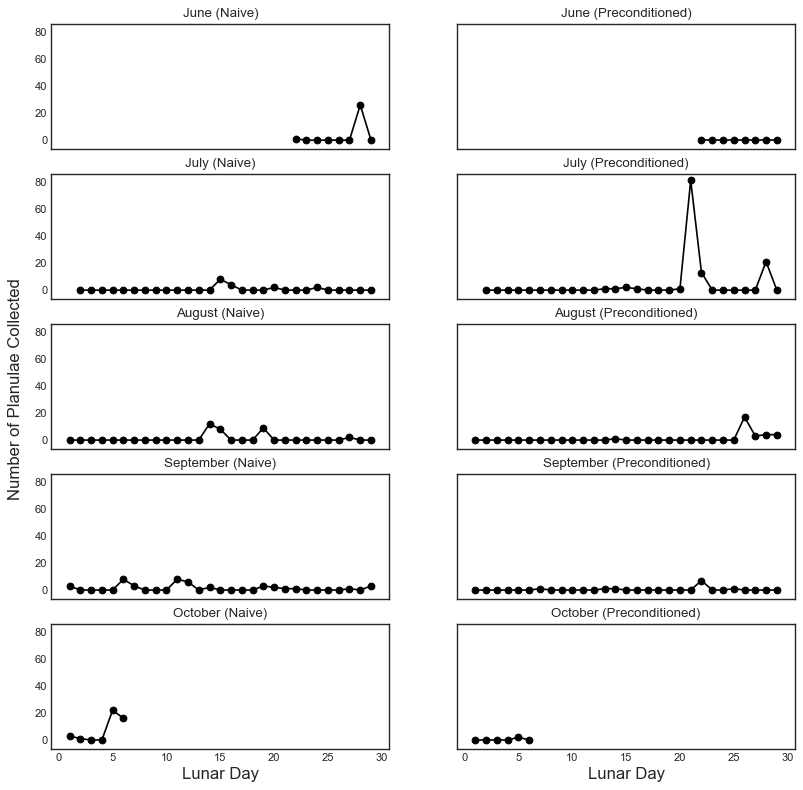

In [15]:
#plot the individual boxes and put them together in a figure
sns.set_style("white")
fig, (
    (ax1, ax2), 
    (ax3, ax4),
    (ax5, ax6),
    (ax7, ax8),
    (ax9, ax10)
) = plt.subplots(5,2, sharex = True, sharey = True, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
ax1.scatter(CLunarJun.Lunar, CLunarJun.Total, color = 'black')
ax1.plot(CLunarJun.Lunar, CLunarJun.Total, color = 'black')
ax1.set_title('June (Naive)')
ax3.scatter(CLunarJul.Lunar, CLunarJul.Total, color = 'black')
ax3.plot(CLunarJul.Lunar, CLunarJul.Total, color = 'black')
ax3.set_title('July (Naive)')
ax5.scatter(CLunarAug.Lunar, CLunarAug.Total, color = 'black')
ax5.plot(CLunarAug.Lunar, CLunarAug.Total, color = 'black')
ax5.set_title('August (Naive)')
ax7.scatter(CLunarSep.Lunar, CLunarSep.Total, color = 'black')
ax7.plot(CLunarSep.Lunar, CLunarSep.Total, color = 'black')
ax7.set_title('September (Naive)')
ax9.scatter(CLunarOct.Lunar, CLunarOct.Total, color = 'black')
ax9.plot(CLunarOct.Lunar, CLunarOct.Total, color = 'black')
ax9.set_title('October (Naive)')
ax9.set_xlabel('Lunar Day', fontdict={'fontsize' : 15})
ax2.scatter(SLunarJun.Lunar, SLunarJun.Total, color = 'black')
ax2.plot(SLunarJun.Lunar, SLunarJun.Total, color = 'black')
ax2.set_title('June (Preconditioned)')
ax4.scatter(SLunarJul.Lunar, SLunarJul.Total, color = 'black')
ax4.plot(SLunarJul.Lunar, SLunarJul.Total, color = 'black')
ax4.set_title('July (Preconditioned)')
ax6.scatter(SLunarAug.Lunar, SLunarAug.Total, color = 'black')
ax6.plot(SLunarAug.Lunar, SLunarAug.Total, color = 'black')
ax6.set_title('August (Preconditioned)')
ax8.scatter(SLunarSep.Lunar, SLunarSep.Total, color = 'black')
ax8.plot(SLunarSep.Lunar, SLunarSep.Total, color = 'black')
ax8.set_title('September (Preconditioned)')
ax10.scatter(SLunarOct.Lunar, SLunarOct.Total, color = 'black')
ax10.plot(SLunarOct.Lunar, SLunarOct.Total, color = 'black')
ax10.set_title('October (Preconditioned)')
ax10.set_xlabel('Lunar Day', fontdict={'fontsize' : 15})
fig.text(0.08, 0.5, 'Number of Planulae Collected', va='center', rotation='vertical', fontdict={'fontsize' : 15})
plt.savefig('Planula Numbers Subplots.pdf')

In [16]:
PAM1216 = pd.read_csv('Full PAM Data 12-16.csv')
#Rename the columns
PAM1216.columns=['ID', 'Preconditioned', 'Heat', 'Time (rel/ms)', 'Date', 'Time', 'Type', 'No.', 'F', 'Fm', 'PAR', 'YII', 'ETR', 'RYII', 'RETR']
#Replace '-' with 'NaN' because one is an object and one is numeric
PAM1216 = PAM1216.replace('-', 'NaN')
#Change the ETR of the runs on bleached corals and blank tile to 0 for PAR of 0
#May come back later to figure out, but there is no ETRm for these runs, so 0 at 0 par is used as ETRm for graphing purposes
PAM1216.loc[(PAM1216['ID'] == 'Blank Tile') & (PAM1216['PAR'] == 40), 'ETR'] = '0'
PAM1216.loc[(PAM1216['ID'] == 'C2_1c') & (PAM1216['PAR'] == 40), 'ETR'] = '0'
PAM1216.loc[(PAM1216['ID'] == 'C2_2c_a') & (PAM1216['PAR'] == 40), 'ETR'] = '0'
PAM1216.loc[(PAM1216['ID'] == 'C2_2c_b') & (PAM1216['PAR'] == 40), 'ETR'] = '0'
PAM1216.loc[(PAM1216['ID'] == 'C2_2c_c') & (PAM1216['PAR'] == 40), 'ETR'] = '0'
#Change the type to float to work with
PAM1216["ETR"] = PAM1216.ETR.astype(float)

In [17]:
PAM1216.head()

,ID,Preconditioned,Heat,Time (rel/ms),Date,Time,Type,No.,F,Fm,PAR,YII,ETR,RYII,RETR
0,NaN,NaN,NaN,0,NaN,NaN,D,NaN,Device Nr: #1,NaN,NaN,NaN,NaN,NaN,NaN
1,Blank Tile,NaN,NaN,0,12/16/19,12:33:37,SLCS,NaN,Light Curve start,NaN,NaN,NaN,NaN,NaN,NaN
2,Blank Tile,NaN,NaN,4829,12/16/19,12:33:42,SCHS,NaN,Chart start,NaN,NaN,NaN,NaN,NaN,NaN
3,Blank Tile,NaN,NaN,4830,12/16/19,12:33:42,FO,625.0,28,28.0,0.0,NaN,NaN,0.000000,0.000000
4,Blank Tile,NaN,NaN,15238,12/16/19,12:33:53,F,626.0,27,28.0,20.0,NaN,NaN,0.035714,0.714286


In [18]:
ETRm = PAM1216.loc[PAM1216['PAR'] == 40]
#Put ETR max into data frame
#ETRm = PAM1216[ETRm]
#Add in size data from 12/5
#create a dataframe of just the two controls
Control_ETRm = ETRm.loc[(ETRm['ID'] == 'Random Damicornis') | (ETRm['ID'] == 'Tile with Algae') | (ETRm['ID'] == 'Blank Tile')]
#Drop the bad run for 0, the partially cleaned tile run, the control runs, and the extra S2-2b and C1_1c_b
##ETRm = ETRm.drop([ETRm.index[0],ETRm.index[1],ETRm.index[2], ETRm.index[7], ETRm.index[12], ETRm.index [13], ETRm.index[15], ETRm.index[16], ETRm.index[19], ETRm.index[20], ETRm.index[23]])
#Drop the bad run for 40
ETRm = ETRm.drop([ETRm.index[0],ETRm.index[1],ETRm.index[2], ETRm.index[7], ETRm.index[12], ETRm.index[14],ETRm.index[15]])
#Add in size data
area = [0.46, 0.03, 0.02, 0.01, 0.03, 0.44, 0.37, 0.22, 0, 0, 0.16, 0, NaN, NaN, 0.08, 0.48]
polyp = [3, 5, 7, 6, 1, 7, 1, 6, 1, 1, 1, 1, 1, 1, 1, 3]
ETRm['Growth'] = area
ETRm['Polyp Count'] = polyp

In [19]:
ETRm

,ID,Preconditioned,Heat,Time (rel/ms),Date,Time,Type,No.,F,Fm,PAR,YII,ETR,RYII,RETR,Growth,Polyp Count
45,S1_1c,Elevated,Ambient,1825968,12/16/19,13:04:03,F,655.0,475,839.0,40.0,0.434,7.3,0.433850,17.353993,0.46,3
58,C1_1b,Naive,Ambient,2775592,12/16/19,13:19:53,F,664.0,303,472.0,40.0,0.358,6.0,0.358051,14.322034,0.03,5
71,C1_1c_a,Naive,Ambient,3790471,12/16/19,13:36:48,F,673.0,219,338.0,40.0,0.352,5.9,0.352071,14.082840,0.02,7
84,C1_1c_b,Naive,Ambient,4247714,12/16/19,13:44:25,F,682.0,187,307.0,40.0,0.391,6.6,0.390879,15.635179,0.01,6
109,C1_2d,Naive,Ambient,5023898,12/16/19,13:57:21,F,699.0,140,236.0,40.0,0.407,6.8,0.406780,16.271186,0.03,1
122,C1_3a,Naive,Ambient,5807502,12/16/19,14:10:25,F,708.0,156,209.0,40.0,0.254,4.3,0.253589,10.143541,0.44,7
135,C1_3b,Naive,Ambient,6574420,12/16/19,14:23:12,F,717.0,125,185.0,40.0,0.324,5.4,0.324324,12.972973,0.37,1
148,C1_3d_b,Naive,Ambient,7144828,12/16/19,14:32:42,F,726.0,179,263.0,40.0,0.319,5.4,0.319392,12.775665,0.22,6
174,C2_1b,Naive,High,8086572,12/16/19,14:48:24,F,744.0,105,152.0,40.0,0.309,5.2,0.309211,12.368421,0.00,1
206,C2_1c,Naive,High,8855957,12/16/19,15:01:13,F,768.0,7,10.0,40.0,NaN,0.0,0.300000,12.000000,0.00,1


In [20]:
#multiple linear regressions
#Create dummy columns where heat and preconditioned are turned to 0s and 1s
ETRm_dummy = pd.get_dummies(ETRm, columns = ['Heat', 'Preconditioned'])
#Drop the excess column created
ETRm_dummy.drop(['Heat_Ambient', 'Preconditioned_Naive'], axis = 1, inplace = True)
ETRm_dummy.rename(columns = {'Heat_High':'Heat'}, inplace = True)
ETRm_dummy.rename(columns = {'Preconditioned_Elevated':'Preconditioned'}, inplace = True)

In [21]:
ETRm_dummy

,ID,Time (rel/ms),Date,Time,Type,No.,F,Fm,PAR,YII,ETR,RYII,RETR,Growth,Polyp Count,Heat,Preconditioned
45,S1_1c,1825968,12/16/19,13:04:03,F,655.0,475,839.0,40.0,0.434,7.3,0.433850,17.353993,0.46,3,0,1
58,C1_1b,2775592,12/16/19,13:19:53,F,664.0,303,472.0,40.0,0.358,6.0,0.358051,14.322034,0.03,5,0,0
71,C1_1c_a,3790471,12/16/19,13:36:48,F,673.0,219,338.0,40.0,0.352,5.9,0.352071,14.082840,0.02,7,0,0
84,C1_1c_b,4247714,12/16/19,13:44:25,F,682.0,187,307.0,40.0,0.391,6.6,0.390879,15.635179,0.01,6,0,0
109,C1_2d,5023898,12/16/19,13:57:21,F,699.0,140,236.0,40.0,0.407,6.8,0.406780,16.271186,0.03,1,0,0
122,C1_3a,5807502,12/16/19,14:10:25,F,708.0,156,209.0,40.0,0.254,4.3,0.253589,10.143541,0.44,7,0,0
135,C1_3b,6574420,12/16/19,14:23:12,F,717.0,125,185.0,40.0,0.324,5.4,0.324324,12.972973,0.37,1,0,0
148,C1_3d_b,7144828,12/16/19,14:32:42,F,726.0,179,263.0,40.0,0.319,5.4,0.319392,12.775665,0.22,6,0,0
174,C2_1b,8086572,12/16/19,14:48:24,F,744.0,105,152.0,40.0,0.309,5.2,0.309211,12.368421,0.00,1,1,0
206,C2_1c,8855957,12/16/19,15:01:13,F,768.0,7,10.0,40.0,NaN,0.0,0.300000,12.000000,0.00,1,1,0


In [22]:
ETRm_dummy['F'] = ETRm_dummy['F'].astype(float)

In [23]:
model = ols('Growth ~ Heat*Preconditioned', ETRm_dummy).fit()
model.summary()
Growthmod = sm.stats.anova_lm(model, typ= 2)
Growthmod

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,sum_sq,df,F,PR(>F)
Heat,0.056353,1.0,1.870938,0.201318
Preconditioned,0.153648,1.0,5.101199,0.047483
Heat:Preconditioned,0.001902,1.0,0.063144,0.806683
Residual,0.301200,10.0,NaN,NaN


In [24]:
model = ols('Growth ~ Heat+Preconditioned', ETRm_dummy).fit()
model.summary()
Growthmod = sm.stats.anova_lm(model, typ= 2)
Growthmod

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,sum_sq,df,F,PR(>F)
Heat,0.056353,1.0,2.045118,0.180479
Preconditioned,0.153648,1.0,5.576109,0.037722
Residual,0.303102,11.0,NaN,NaN


In [25]:
model = ols('RETR ~ Heat*Preconditioned', ETRm_dummy).fit()
model.summary()
ETRmod = sm.stats.anova_lm(model, typ= 2)
ETRmod

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,sum_sq,df,F,PR(>F)
Heat,51.736718,1.0,7.653219,0.017074
Preconditioned,39.090076,1.0,5.782449,0.033234
Heat:Preconditioned,0.275976,1.0,0.040824,0.843263
Residual,81.121500,12.0,NaN,NaN


In [26]:
model = ols('ETR ~ Heat*Preconditioned', ETRm_dummy).fit()
model.summary()
ETRmod = sm.stats.anova_lm(model, typ= 2)
ETRmod

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,sum_sq,df,F,PR(>F)
Heat,56.571662,1.0,20.739555,0.000661
Preconditioned,28.744803,1.0,10.538039,0.007005
Heat:Preconditioned,5.270078,1.0,1.932046,0.189781
Residual,32.732619,12.0,NaN,NaN


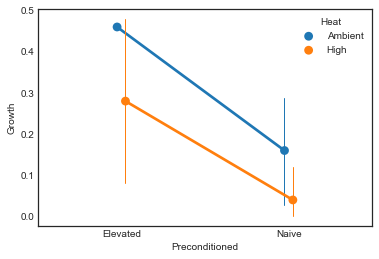

In [27]:
sns.pointplot('Preconditioned', 'Growth', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
plt.savefig('Average Change in Area.pdf')

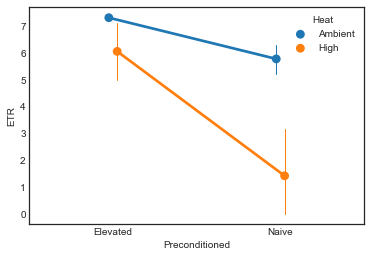

In [28]:
sns.pointplot('Preconditioned', 'ETR', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
plt.savefig('ETRmax plot.pdf')

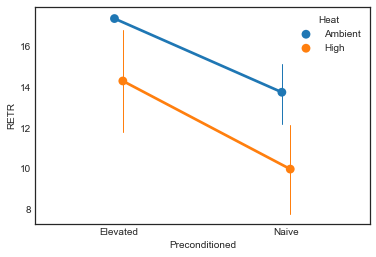

In [29]:
sns.pointplot('Preconditioned', 'RETR', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
plt.savefig('ETRmax plot.pdf')

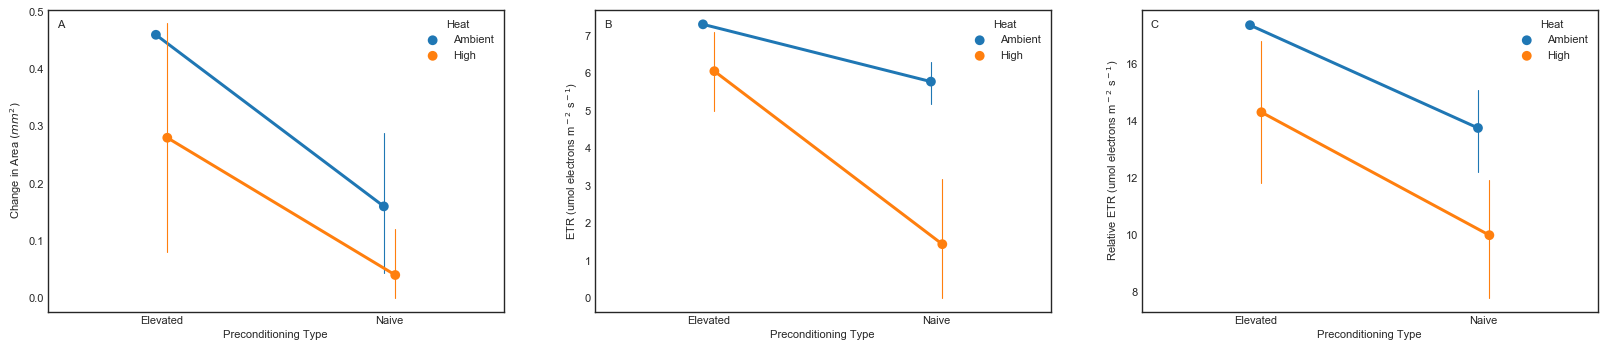

In [30]:
fig = plt.figure(figsize=(25, 5), dpi=80)
ax2 = fig.add_subplot(1, 3, 2)
sns.pointplot('Preconditioned', 'ETR', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
ax1 = fig.add_subplot(1, 3, 1)
sns.pointplot('Preconditioned', 'Growth', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
ax3 = fig.add_subplot(1,3,3)
sns.pointplot('Preconditioned', 'RETR', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
ax3.set(ylabel = 'Relative ETR (umol electrons m$^-$$^2$ s$^-$$^1$)')
ax2.set(ylabel = 'ETR (umol electrons m$^-$$^2$ s$^-$$^1$)')
ax1.set(ylabel='Change in Area $(mm^2)$')
ax2.set(xlabel = 'Preconditioning Type')
ax1.set(xlabel = 'Preconditioning Type')
ax3.set(xlabel = 'Preconditioning Type')
ax2.annotate("B", xy=(0.02, 0.94), xycoords="axes fraction")
ax1.annotate("A", xy=(0.02, 0.94), xycoords="axes fraction")
ax3.annotate("C", xy=(0.02, 0.94), xycoords="axes fraction")

plt.savefig('Combined Plots.pdf')

In [31]:
###Fprime/FM Look at this for possible ways of checking health of corals 

In [32]:
import pandas as pdimport
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

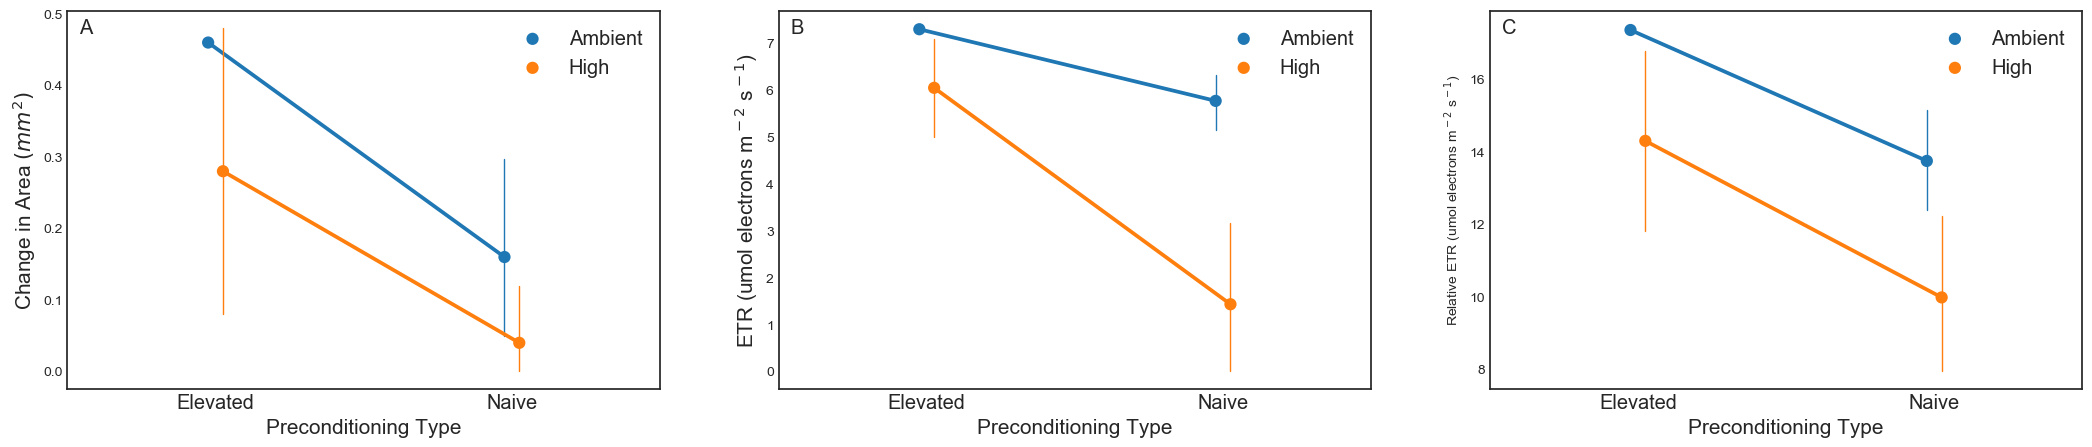

In [33]:
#This is the good one, corrects for font size and makes it actually the readable
fig = plt.figure(figsize=(26, 5), dpi=100)
ax2 = fig.add_subplot(1, 3, 2)
sns.pointplot('Preconditioned', 'ETR', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
ax1 = fig.add_subplot(1, 3, 1)
sns.pointplot('Preconditioned', 'Growth', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1)
ax3 = fig.add_subplot(1,3,3)
sns.pointplot('Preconditioned', 'RETR', hue='Heat',
    data=ETRm, dodge=True, join=True, errwidth = 1, fontdict={'fontsize' : 13})
ax3.set_ylabel('Relative ETR (umol electrons m$^-$$^2$ s$^-$$^1$)')
ax2.set_ylabel('ETR (umol electrons m$^-$$^2$ s$^-$$^1$)', fontdict={'fontsize' : 15})
ax1.set_ylabel('Change in Area $(mm^2)$', fontdict={'fontsize' : 15})
ax2.set_xlabel('Preconditioning Type', fontdict={'fontsize' : 15})
ax1.set_xlabel('Preconditioning Type', fontdict={'fontsize' : 15})
ax3.set_xlabel('Preconditioning Type', fontdict={'fontsize' : 15})
ax2.annotate("B", xy=(0.02, 0.94), xycoords="axes fraction", fontsize =  'x-large')
ax1.annotate("A", xy=(0.02, 0.94), xycoords="axes fraction", fontsize =  'x-large')
ax3.annotate("C", xy=(0.02, 0.94), xycoords="axes fraction", fontsize =  'x-large')
ax1.legend(fontsize='x-large')
ax2.legend(fontsize='x-large')
ax3.legend(fontsize='x-large')
ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 'x-large')
ax2.set_xticklabels(ax2.get_xmajorticklabels(), fontsize = 'x-large')
ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 'x-large')
plt.savefig('Combined Plots.pdf')